# Tarea 2 

In [1]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from IPython import display
from IPython.display import HTML
import sympy as sym
from sympy import Symbol
from ipywidgets import interact, fixed, widgets 
from sympy.interactive import printing
printing.init_printing(use_latex=True)

### Mapeo logístico
logístico
$$
x_{n+1} = rx_n(1 -x_n)
$$
Donde, para fines de esta clase, $r$ esta contenido en 

$$
0 \leq r \leq 4
$$

la razón de esto, es que el cuadro unitario mapea al cuadro unitario, i.e.

$$ 
0 \leq x \leq 1 \to 0 \leq f(x) \leq 1
$$

<div class="alert alert-info">
    
**Ejercicio** ¿Por qué?
</div>

Se tiene que 
$$
0 \leq r \leq 4
$$
y, además, 
$$ 
0 \leq x \leq 1 
$$
Entonces, 
$$ 
0 \leq x (1-x) \leq x \leq 1
$$
Por lo tanto, 
$$
0 \leq rx (1-x) \leq 4
$$
$$
0 \leq f(x) \leq 4
$$

<div class="alert alert-info">
    
**Ejercicio**  Define la función `logistic_map` que recibe como parámetros $x$ y $r$ regresa $rx(1−x)$. 
</div>

In [2]:
def logistic_map(x,r):
    return r*x*(1-x)

<div class="alert alert-info">
    
**Ejercicio** Calcule el punto fijo para $r = 2$ usando SymPy
</div>

In [3]:
x = sym.Symbol('x')
def puntoFijo(r):
    return 1-(1/r)
x = puntoFijo(2)
x

<div class="alert alert-warning">

**Teorema:**

Sea $f(x_0) = x_0.$, entonces, 

<ul>
<li>Si $f'(x)$ es contínua y $|f'(x_0)| < 1$ entonces $x_0$ es estable.</li>


<li>Si $f'(x)$ es contínua y $|f'(x_0)| > 1$ entonces $x_0$ es inestable.</li>
</ul>
</div>

<div class="alert alert-info">
    
**Ejercicio** ¿Cuáles son las condiciones de estabilidad para el parámetro $r$? Los valores de $r$ para cuales cambia de estable a inestable y viceversa, se llaman _puntos de bifurcación_.
</div>

In [ ]:
r = sym.Symbol('r')
solve(abs(diff(r*x*(1-x), x))<1)

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterar` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro `r` regrese $g(g( \ldots(g(x_0, r),r) \ldots)$. En otras palabras que itere `g`, `N` veces a partir del punto `x0`.
</div>

In [18]:
def iterar(g, x0, N, r):
    if N==0:
        return x0
    if N>1:
        return g(iterar(g, x0, N-1, r), r)
    else:
        return g(x0, r)
x = iterar(logistic_map, 0.35, 100, 2.8)
x

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterarLista` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro $r$ regrese la lista $[x_0, g(x), g(g(x)), \ldots g(g(\ldots(g(x))\ldots))]$ En otras palabras que itere `g`, `N-1` veces a partir del punto `x0` y devuelva la órbita completa empezando desde `x0`.
</div>

In [19]:
def iterarLista(g, x0, N, mu):
    return[iterar(g, x0, i, mu) for i in range(N)]

<div class="alert alert-info">
    
**Ejercicio** Usa las funciones recién definidas para calcular iteraciones para $r = \{ 0.8, 1.2, 2.8, 3.2\}$,
</div>

In [27]:
r = [0.8, 1.2, 2.8, 3.2]
print("IterarLista: ")
for i in r:
    print("r = ", i, "\n", iterarLista(logistic_map, 0.5, 100, i),"\n")

IterarLista: 
r =  0.8 
 [0.5, 0.2, 0.12800000000000003, 0.08929280000000003, 0.06505567669452801, 0.048658748499476046, 0.03703285975515263, 0.02852914164280626, 0.02217218377594477, 0.017344462434040402, 0.013634905645531652, 0.010759195994855282, 0.008514748557119659, 0.00675379809130295, 0.00536654744211589, 0.004270198088533929, 0.003401570797454888, 0.0027120000908518326, 0.002163716117087242, 0.001727227559721519, 0.0013793953957427659, 0.0011019941312679757, 0.0008806237921621013, 0.0007038786351190235, 0.0005627065519888372, 0.0004499119306601488, 0.0003597676079318388, 0.0002877105401600974, 0.00023010221024414258, 0.0001840394105735867, 0.00014720443205515398, 0.00011774621032826985, 9.418587692657855e-05, 7.53416047577329e-05, 6.026874272026035e-05, 4.821208831912901e-05, 3.8567811130935136e-05, 3.0853058923903765e-05, 2.4681685610127044e-05, 1.9744861139617994e-05, 1.5795577024061257e-05, 1.2636262019046189e-05, 1.01088818751427e-05, 8.087023748519948e-06, 6.46956667885347

<div class="alert alert-info">
    
**Ejercicio** Programa un control para cambiar $r$ entre $0$ y $4$ (con un slider) y otro para definid $x_0$. Grafica `logistic_map` respecto al número de iteraciones $N$. ¿Qué observas? ¿Puedes ver algún _periodo_?¿Está cerca de los puntos fijos?
</div>

In [35]:
def aux(x0, N, mu):
    return iterarLista(logistic_map, x0, N, mu)
interact(aux, x0=widgets.IntSlider(min=0, max=10, step=1, value=5), N=widgets.IntSlider(min=0, max=10, step=1, value=5),  mu=widgets.IntSlider(min=0, max=4, step=1, value=2))

interactive(children=(IntSlider(value=5, description='x0', max=10), IntSlider(value=5, description='N', max=10…

<function __main__.aux(x0, N, mu)>

In [37]:
interact(aux, x0=fixed(5), N=fixed(5), mu=widgets.IntSlider(min=0, max=4, step=1, value=2))

interactive(children=(IntSlider(value=2, description='mu', max=4), Output()), _dom_classes=('widget-interact',…

<function __main__.aux(x0, N, mu)>

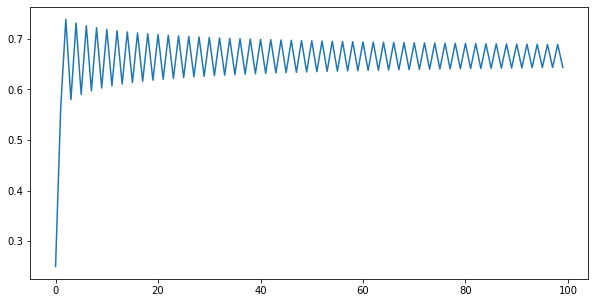

In [31]:
y = iterarLista(logistic_map, 0.25, 100, 3)
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(y)

<div class="alert alert-info">
    
**Ejercicio** ¿Qué sucede para (a) $x_0 = 0.35$ en $r = 2.8$ y (b) para $x_0 = 0.35$ en $r=3.1$. ¿Porqué escogí estos valores?
</div>

In [36]:
iterarLista(logistic_map, 0.35, 100, 2.8)

In [37]:
iterarLista(logistic_map, 0.35, 100, 3.1)

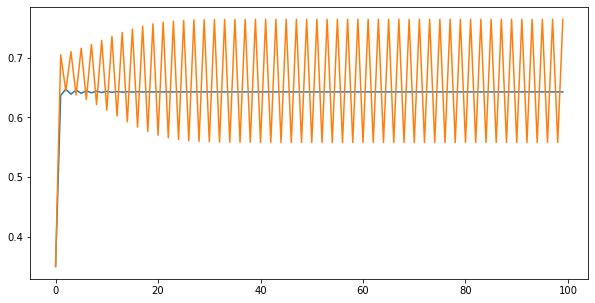

In [38]:
y1 = iterarLista(logistic_map, 0.35, 100, 2.8)
y2 = iterarLista(logistic_map, 0.35, 100, 3.1)
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(y1)
plt.plot(y2)

Aunque los valores de r sean muy cercanos, loss datos obtenidos (y las gráficas) son muy diferentes. Así se ejemplifica el caos

## Diagrama de CobWeb

<div class="alert alert-info">
    
**Ejercicio** Dibuja en una gráfica `logistic_map`, como ejes usa $N_{n+1}$ y $N_n$, además agrega la línea $y = x$ en la misma gráfica. ¿Qué observas para los distintos valores de $r$? Grafícala junto a la gráfica anterior.
</div>

In [49]:
def graficar(r):
    x = linspace(0,1, num=1000)
    plt.plot(x,r*x*(1-x))
    plt.plot(x,x)
    plt.show()
interact(graficar, r=widgets.FloatSlider(min=0, max=4, step=0.1, value=0.5))

interactive(children=(FloatSlider(value=0.5, description='r', max=4.0), Output()), _dom_classes=('widget-inter…

<function __main__.graficar(r)>

<div class="alert alert-info">
    
**Ejercicio** Agrega los segmentos de línea $(x_0, x_0), (x_0. f(x_0)), (f(x_0), f(x_0)), (f(x_0), f(f(x_0))), \ldots$
</div>

## Diagrama de Bifurcación

<div class="alert alert-info">
    
**Ejercicio** ¿Qué hace el siguiente código? Modificalo para que use nuestras funciones.
</div>

In [7]:
import math
from PIL import Image
imgx = 1000
imgy = 500
image = Image.new("RGB", (imgx, imgy))

xa = 1
xb = 4
maxit = 5000

for i in range(imgx):
    r = xa + (xb - xa) * float(i) / (imgx - 1)
    x = 0.5
    for j in range(maxit):
        x = r * x * (1 - x)
        if j > maxit / 2:
            image.putpixel((i, int(x * imgy)), (255, 255, 255))

image.save("bifurcacion.png", "PNG")

Primero crea una imagen con el tamaño dado (imgx, imgy). Después, a través de un ciclo que se repite imgx - veces, se realiza lo siguiente: 
1. asigna a la variable r el siguiente valor: xa + (xb - xa) * float(i) / (imgx - 1)
    Nótese que esta función depende de i (el número de la iteración que se está realizando
2. Se asigna a x el valor 0.5 
3. se inicia un nuevo ciclo, el cual se repite "maxit" veces 
    * se asigna a x un nuevo valor, el cual es el equivalente a la función logistic_map
    * si la iteración que se está realizando (j) es mayor a la mitad del número total de iteraciones (maxiter), entonces inserta in pixel en la coordenada (i, int(x * imgy))

<div class="alert alert-info">
    
**Ejercicio**  Repite todo lo anterior para el mapeo

$$
f(x,\mu) = 1 - \mu x^2
$$

¿Qué diferencia observas? ¿Cuáles son sus puntos fijos? ¿Cuáles son los valores interesantes?
</div>

In [ ]:
def mapeo(x, mu):
    return 1-mu*x**2

def puntoFijo2(mu):
    x1 = sym.Symbol('x')
    return solve(x1=1-mu*x1**2)

def iterar2(g, x0, N, mu):
    if N==0:
        return x0
    if N>1:
        return g(iterar(g, x0, N-1, mu), mu)
    else:
        return g(x0, mu)
    
def iterarLista2(g, x0, N, mu):
    return[iterar(g, x0, i, mu) for i in range(N)]



In [ ]:
mu = sym.Symbol('mu')
solve(abs(diff(1-mu*x**2, x))<1)

In [ ]:
r = [0.8, 1.2, 2.8, 3.2]
print("IterarLista: ")
for i in r:
    print(iterarLista(mapeo, 10, 10, i))

In [ ]:
def aux(x0, N, mu):
    return iterarLista(mapeo, x0, N, mu)
interact(aux, x0=widgets.IntSlider(min=0, max=10, step=1, value=5), N=widgets.IntSlider(min=0, max=10, step=1, value=5),  mu=widgets.IntSlider(min=0, max=4, step=1, value=2))

In [ ]:
interact(aux, x0=fixed(5), N=fixed(5), mu=widgets.IntSlider(min=0, max=4, step=1, value=2))

In [ ]:
y = iterarLista(mapeo, 0.35, 100, 2.8)
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(y)

In [ ]:
iterarLista(mapeo, 0.35, 100, 2.8)

In [ ]:
iterarLista(mapeo, 0.35, 100, 3.1)

In [ ]:
y1 = iterarLista(mapeo, 0.35, 100, 2.8)
y2 = iterarLista(mapeo, 0.35, 100, 3.1)
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(y1)
plt.plot(y2)

In [51]:
def graficar2(mu):
    x = linspace(0,1, num=1000)
    plt.plot(x,1-mu*x**2)
    plt.plot(x,x)
    plt.show()
interact(graficar2, mu=widgets.FloatSlider(min=0, max=4, step=0.1, value=0.5))

interactive(children=(FloatSlider(value=0.5, description='mu', max=4.0), Output()), _dom_classes=('widget-inte…

<function __main__.graficar2(mu)>

In [ ]:
import math
from PIL import Image
imgx = 1000
imgy = 500
image = Image.new("RGB", (imgx, imgy))

xa = 1
xb = 4
maxit = 5000

for i in range(imgx):
    mu = xa + (xb - xa) * float(i) / (imgx - 1)
    x = 0.5
    for j in range(maxit):
        x = 1-mu*x**2
        if j > maxit / 2:
            image.putpixel((i, int(x * imgy)), (255, 255, 255))

image.save("bifurcacion.png", "PNG")

# Fractales y Recursividad

<div class="alert alert-info">
    
**Ejercicio** Haga lo mismo para el factorial.
</div>

In [49]:
def factorial(n):
    if(n == 0):
        return 1
    else:
        return n * factorial(n-1)

In [52]:
factorial(4)

<div class="alert alert-info">
    
**Ejercicio** Genera de la misma manera el [Triángulo de Sierpinski](http://en.wikipedia.org/wiki/Sierpinski_triangle)
</div>

In [58]:
class Triangulo:
    def __init__(self, x1, y1, x2, y2, x3, y3):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        self.x3 = x3
        self.y3 = y3
    
    def _generar(self, x1, y1, x2, y2, x3, y3, iteracion):
        
        if iteracion == 0:
            self.dibujar(x1, y1, x2, y2, x3, y3)
            
        elif iteracion > 0:
            
            self.dibujar(x1, y1, x2, y2, x3, y3)
            #Buscamos las nuevass coordenadas del triángulo interno
            
            x1n = (x2 +x1) / 2
            y1n = (y2 +y1) / 2
            
            x2n = (x3+ x2) / 2
            y2n = (y3 +y2) / 2
            
            x3n = (x1 +x3) / 2
            y3n = (y1 +y3) / 2
            
            
            self._generar(x1, y1, x1n, y1n, x3n, y3n, iteracion - 1)
            self._generar(x1n, y1n, x2, y2, x2n, y2n, iteracion - 1)
            self._generar(x3n, y3n, x2n, y2n, x3, y3, iteracion - 1)
            
            
    def dibujar(self, x1, y1, x2, y2, x3, y3):
        plot([x1, x2, x3, x1], [y1, y2, y3, y1], lw=1.0, color='black')
        
    def generar(self, iteraciones=0):
        return self._generar(self.x1, self.y1, self.x2, self.y2, self.x3, self.y3, iteraciones)

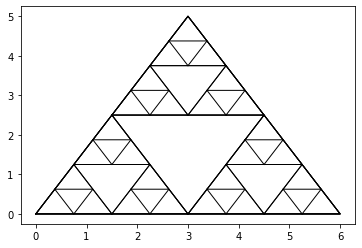

In [59]:
t = Triangulo(0,0,6,0,3,5)
t.generar(3)